##### Import Libraries

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from sklearn import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import EarlyStopping

print(tf.__version__)

2.3.0


##### Mount Drive to access dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
filename = "drive/My Drive/JF30-1.zip"
with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print("done!")

done!


##### Import Data

In [ ]:
classlabels = open("classlabels.txt", "r")
image = []
label = []

for line in classlabels:
    words = line.split()
    image.append(words[0][:-1])
    label.append(words[1])

df = pd.DataFrame([], columns = ["image", "label"])
df['image'] = image
df['label'] = label


df2 = df.reindex(np.random.permutation(df.index))
df2

,image,label
918,JFT_00583.jpg,12
1356,JFT_01294.jpg,27
1187,JFT_01030.jpg,22
1431,JFT_01403.jpg,28
1372,JFT_01316.jpg,27
...,...,...
807,JFT_00389.jpg,8
268,JFT_00714.jpg,15
56,JFT_00139.jpg,4
462,JFT_01218.jpg,25


In [ ]:
df2.shape

(1479, 2)

In [ ]:
train_df = df2.head(1200)
test_df = df2.tail(279)

##### Preprocess Dataset

In [ ]:
#Training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True)
# Data generator for training data
train_generator = train_datagen.flow_from_dataframe(
dataframe=train_df,
x_col = "image",
y_col = "label",
directory="./jpg/",
class_mode = "categorical",
target_size=(128, 128))

Found 1200 validated image filenames belonging to 30 classes.


In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True)
# Data generator for test data
test_generator = test_datagen.flow_from_dataframe(
dataframe=test_df,
x_col = "image",
y_col = "label",
directory="./jpg/",
class_mode = "categorical",
target_size=(128, 128),
shuffle=False)

Found 279 validated image filenames belonging to 30 classes.


##### Baseline

In [ ]:

print("Distribution of testing target variable:")
frequency = test_df['label'].value_counts(normalize =True)
print(frequency*100)

Distribution of testing target variable:
24    6.451613
28    5.376344
23    5.376344
6     5.376344
18    4.659498
25    4.301075
14    4.301075
22    3.942652
17    3.942652
13    3.942652
10    3.942652
12    3.584229
19    3.584229
26    3.584229
27    3.584229
7     3.584229
20    3.225806
3     3.225806
21    3.225806
29    3.225806
4     2.867384
2     2.508961
11    2.508961
9     2.150538
15    1.792115
8     1.792115
5     1.792115
16    1.075269
30    0.716846
1     0.358423
Name: label, dtype: float64


##### Build Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Output classes are 30
model.add(Dense(30))
model.add(Activation('softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 32)        9

##### Fit Model

In [ ]:
## Compile
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
## Train Model
history = model.fit_generator(train_generator,
epochs=50,
validation_data=test_generator,
verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
38/38 [==============================] - 104s 3s/step - loss: 3.3523 - accuracy: 0.0700 - val_loss: 3.0179 - val_accuracy: 0.0824
Epoch 2/50
38/38 [==============================] - 100s 3s/step - loss: 2.9571 - accuracy: 0.1183 - val_loss: 2.7229 - val_accuracy: 0.1864
Epoch 3/50
38/38 [==============================] - 99s 3s/step - loss: 2.7099 - accuracy: 0.1442 - val_loss: 2.5767 - val_accuracy: 0.2294
Epoch 4/50
38/38 [==============================] - 108s 3s/step - loss: 2.5904 - accuracy: 0.1617 - val_loss: 2.5064 - val_accuracy: 0.1935
Epoch 5/50
38/38 [==============================] - 102s 3s/step - loss: 2.4724 - accuracy: 0.1975 - val_loss: 2.4764 - val_accuracy: 0.2151
Epoch 6/50
38/38 [==============================] - 99s 3s/step - loss: 2.4146 - accuracy: 0.2225 - val_loss: 2.3820 - val_accuracy: 0.2151
Epoch 7/50
38/38 [==============================] - 100s 3s/step - loss: 2.3574 

In [ ]:
print("Minimum accuracy of Model: ", min(history.history['accuracy']))
print("Maximum accuracy of Model: ", max(history.history['accuracy']))

Minimum accuracy of Model:  0.07000000029802322
Maximum accuracy of Model:  0.7166666388511658


In [ ]:
print("Minimum accuracy of validation: ", min(history.history['val_accuracy']))
print("Maximum accuracy of validation: ", max(history.history['val_accuracy']))


Minimum accuracy of validation:  0.08243727684020996
Maximum accuracy of validation:  0.7311828136444092


##### Plot Results

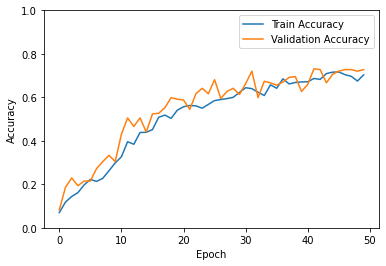

In [19]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),
           label='Train Accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),
           label = 'Validation Accuracy')
  plt.legend()
  plt.ylim([0, 1])

plot_history(history)

##### Classification Report 

In [ ]:
import sklearn.metrics as metrics
predictions = model.predict_generator(test_generator)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels, zero_division='warn')
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
          10       0.78      0.70      0.74        10
          11       0.57      1.00      0.73         4
          12       0.67      0.50      0.57         8
          13       0.36      0.56      0.43         9
          14       0.50      0.57      0.53         7
          15       0.50      0.67      0.57         3
          16       0.67      0.67      0.67         6
          17       0.88      0.70      0.78        10
          18       0.61      1.00      0.76        11
          19       0.90      0.90      0.90        10
           2       0.83      0.88      0.86        17
          20       1.00      0.90      0.95        10
          21       0.43      0.60      0.50         5
          22       0.80      0.89      0.84         9
          23       0.86      1.00      0.92        12
          24       0.60      0.69      0.64        13
          25       0.92    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Inference 

* CNN Classification Model for the Jena Flowers dataset with 30 classes of images. 
* The output activation function is Softmax, loss function is categorical_crossentropy and optimzer is Adam.
* The baseline of the model is 6.4% and it is calculated using majority classification rule. 
* The model and validation accuracy is exceeding baseline accuracy. The maximum validation accuracy is 73.11%.